# Project

Create a dataframe containing information available from PubChem about the gene IDs, symbols, names, taxonomy IDs, taxonomies, and gene descriptions for the transporter MRFP, and save as a csv file. Also, remove any entries that are unrelated to the transporter protein MYRF. 
- Hint: Refer to the [PUG-REST tutorial](https://pubchemdocs.ncbi.nlm.nih.gov/pug-rest-tutorial).

Next is to prepare a dataframe for regression modeling (i.e. continuous value outcomes) using the PubChem assay ID P49841 for GSK-3B inhibition, and save it to a csv file. Your dataframe should have 4 columns: CID, SMILES, Ki (in micromolar), and pKi. Drop CID duplicates, and keep the CID with the higher pKi value. 
- Hint: pKi can be calculated using the log function in numpy. 

In [93]:
import requests
import urllib.request, urllib.parse, urllib.error
import json
import pandas as pd
import numpy as np

gene = 'MYRF'

response = requests.get(f'https://pubchem.ncbi.nlm.nih.gov/rest/pug/gene/genesymbol/{gene}/aids/TXT')
txt = response.text
aids = txt.split('\n')[:-1]

print(f'There are {len(aids)} assays in PubChem that test for MYRF:\n\n', aids)
txt

There are 12 assays in PubChem that test for MYRF:

 ['1904', '624099', '651810', '651811', '743454', '1117281', '1117357', '1159506', '1159578', '1159584', '1224830', '1508588']


'1904\n624099\n651810\n651811\n743454\n1117281\n1117357\n1159506\n1159578\n1159584\n1224830\n1508588\n'

In [95]:
desc = pd.DataFrame()
n = 0
total = []

for aid in aids:
    url = f'https://pubchem.ncbi.nlm.nih.gov/rest/pug/assay/aid/{aid}/summary/JSON'

    try:
        response = requests.get(url)
        temp_df = pd.DataFrame(response.json()['AssaySummaries']['AssaySummary'])[['AID',
                            'Name', 'SourceName', 'CIDCountAll', 'CIDCountActive']]
        total.append(temp_df)
        print(f'{aid} - success')
        
    except urllib.request.URLError:
        print(f'{aid} - AID not found')
        
desc = pd.concat(total)

1904 - success
624099 - success
651810 - success
651811 - success
743454 - success
1117281 - success
1117357 - success
1159506 - success
1159578 - success
1159584 - success
1224830 - success
1508588 - success


In [96]:
desc.sort_values(by='CIDCountActive', ascending=False)

,AID,Name,SourceName,CIDCountAll,CIDCountActive
0,1904,siRNA Circadian Assay,The Genomics Institute of the Novartis Researc...,0,0
0,624099,An siRNA screen for human genes that are invol...,"ICCB-Longwood/NSRB Screening Facility, Harvard...",0,0
0,651810,Genome-wide high-content siRNA screens for reg...,NCGC,0,0
0,651811,Genome-wide high-content siRNA screens for reg...,NCGC,0,0
0,743454,RNAi screen for vorinostat resistance genes - ...,1154,0,0
0,1117281,A whole genome RNAi screen highlights componen...,NCGC,0,0
0,1117357,InfectX: Pathogen infection siRNA screens,10589,0,0
0,1159506,Identification of proteins required for the pr...,NCGC,0,0
0,1159578,A screen to identify genes that regulate lymph...,1154,0,0
0,1159584,A screen to identify synthetic lethal interact...,1154,0,0


In [ ]:
desc.to_csv('myrf_pubchem_assays.csv', index=False)

In [97]:
#ChEMBL database

from chembl_webresource_client.new_client import new_client
chembl_id = "CHEMBL686321"

overview = new_client.assay.get(chembl_id)

# print assay overview
overview



{'aidx': 'CLD0',
 'assay_category': None,
 'assay_cell_type': None,
 'assay_chembl_id': 'CHEMBL686321',
 'assay_classifications': [],
 'assay_organism': None,
 'assay_parameters': [],
 'assay_strain': None,
 'assay_subcellular_fraction': None,
 'assay_tax_id': None,
 'assay_test_type': None,
 'assay_tissue': None,
 'assay_type': 'B',
 'assay_type_description': 'Binding',
 'bao_format': 'BAO_0000357',
 'bao_label': 'single protein format',
 'cell_chembl_id': None,
 'confidence_description': 'Homologous single protein target assigned',
 'confidence_score': 8,
 'description': 'Inhibitory activity against human glycogen synthase kinase-3beta (GSK3-beta) at 100 uM ATP',
 'document_chembl_id': 'CHEMBL1145856',
 'relationship_description': 'Homologous protein target assigned',
 'relationship_type': 'H',
 'src_assay_id': None,
 'src_id': 1,
 'target_chembl_id': 'CHEMBL262',
 'tissue_chembl_id': None,
 'variant_sequence': None}

In [98]:
records = new_client.activity.filter(assay_chembl_id=chembl_id)

print(len(records))
records[0]

15


{'action_type': None,
 'activity_comment': None,
 'activity_id': 105841,
 'activity_properties': [],
 'assay_chembl_id': 'CHEMBL686321',
 'assay_description': 'Inhibitory activity against human glycogen synthase kinase-3beta (GSK3-beta) at 100 uM ATP',
 'assay_type': 'B',
 'assay_variant_accession': None,
 'assay_variant_mutation': None,
 'bao_endpoint': 'BAO_0000190',
 'bao_format': 'BAO_0000357',
 'bao_label': 'single protein format',
 'canonical_smiles': 'O=C1NC(=O)C(c2ccccc2[N+](=O)[O-])=C1Nc1ccc(O)c(Cl)c1',
 'data_validity_comment': None,
 'data_validity_description': None,
 'document_chembl_id': 'CHEMBL1145856',
 'document_journal': 'J Med Chem',
 'document_year': 2003,
 'ligand_efficiency': {'bei': '17.85',
  'le': '0.35',
  'lle': '3.99',
  'sei': '5.28'},
 'molecule_chembl_id': 'CHEMBL322970',
 'molecule_pref_name': None,
 'parent_molecule_chembl_id': 'CHEMBL322970',
 'pchembl_value': '6.42',
 'potential_duplicate': 0,
 'qudt_units': 'http://www.openphacts.org/units/Nanomolar'

In [99]:
import pandas as pd
data = pd.DataFrame(records)
data.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,105841,[],CHEMBL686321,Inhibitory activity against human glycogen syn...,B,None,None,BAO_0000190,...,Homo sapiens,Glycogen synthase kinase-3 beta,9606,None,None,IC50,uM,UO_0000065,None,0.38
1,None,None,114696,[],CHEMBL686321,Inhibitory activity against human glycogen syn...,B,None,None,BAO_0000190,...,Homo sapiens,Glycogen synthase kinase-3 beta,9606,None,None,IC50,uM,UO_0000065,None,6.92
2,None,None,118600,[],CHEMBL686321,Inhibitory activity against human glycogen syn...,B,None,None,BAO_0000190,...,Homo sapiens,Glycogen synthase kinase-3 beta,9606,None,None,IC50,uM,UO_0000065,None,0.41
3,None,None,118601,[],CHEMBL686321,Inhibitory activity against human glycogen syn...,B,None,None,BAO_0000190,...,Homo sapiens,Glycogen synthase kinase-3 beta,9606,None,None,IC50,uM,UO_0000065,None,0.16
4,None,None,118602,[],CHEMBL686321,Inhibitory activity against human glycogen syn...,B,None,None,BAO_0000190,...,Homo sapiens,Glycogen synthase kinase-3 beta,9606,None,None,IC50,uM,UO_0000065,None,250.0


In [ ]:
data.to_csv("data/gsk3b_compounds.csv")

In [403]:
#Accessing Other ChEMBL databases
#query by target. We could look up the uniprot ID for gsk-3b and then get all bioactivity information associated with that target


from chembl_webresource_client.new_client import new_client
import pandas as pd

uniprot_id = "P49841"

# Create a ChEMBL web resource client
client = new_client

# Get information about the target using the specified UniProt ID
targets = client.target.filter(target_components__accession=uniprot_id).only(
    "target_chembl_id", "organism", "pref_name", "target_type"
)

# Convert the results to a Pandas DataFrame
target_list = pd.DataFrame(targets)

target_list.head()  # Display the first few rows of the DataFrame


,organism,pref_name,target_chembl_id,target_type
0,Homo sapiens,Glycogen synthase kinase-3 beta,CHEMBL262,SINGLE PROTEIN
1,Homo sapiens,Glycogen synthase kinase-3,CHEMBL2095188,PROTEIN FAMILY
2,Homo sapiens,Axin-1/Glycogen synthase kinase-3 beta,CHEMBL3883309,PROTEIN-PROTEIN INTERACTION


In [404]:
target_list = pd.DataFrame(targets)
target_list.head()

,organism,pref_name,target_chembl_id,target_type
0,Homo sapiens,Glycogen synthase kinase-3 beta,CHEMBL262,SINGLE PROTEIN
1,Homo sapiens,Glycogen synthase kinase-3,CHEMBL2095188,PROTEIN FAMILY
2,Homo sapiens,Axin-1/Glycogen synthase kinase-3 beta,CHEMBL3883309,PROTEIN-PROTEIN INTERACTION


In [405]:
bioactivities = new_client.activity.filter(target_chembl_id="CHEMBL262", type="IC50", relation="=", assay_type="B").only(
                                                                                                                        "activity_id",
                                                                                                                        "assay_chembl_id",
                                                                                                                        "assay_description",
                                                                                                                        "assay_type",
                                                                                                                        "molecule_chembl_id",
                                                                                                                        "type",
                                                                                                                        "standard_units",
                                                                                                                        "relation",
                                                                                                                        "standard_value",
                                                                                                                        "target_chembl_id",
                                                                                                                        "target_organism",
                                                                                                                        "canonical_smiles"
                                                                                                                    )


In [407]:
bioactivities = pd.DataFrame(bioactivities)
bioactivities.head()

,activity_id,assay_chembl_id,assay_description,assay_type,canonical_smiles,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type,units,value
0,105841,CHEMBL686321,Inhibitory activity against human glycogen syn...,B,O=C1NC(=O)C(c2ccccc2[N+](=O)[O-])=C1Nc1ccc(O)c...,CHEMBL322970,=,nM,380.0,CHEMBL262,Homo sapiens,IC50,uM,0.38
1,114696,CHEMBL686321,Inhibitory activity against human glycogen syn...,B,CN(C)Cc1c(-c2n[nH]c(-c3ccncc3)n2)nnn1-c1nonc1N,CHEMBL112564,=,nM,6920.0,CHEMBL262,Homo sapiens,IC50,uM,6.92
2,118600,CHEMBL686321,Inhibitory activity against human glycogen syn...,B,CCN(CC)Cc1c(C(=O)N/N=C/c2ccncc2)nnn1-c1nonc1N,CHEMBL321421,=,nM,410.0,CHEMBL262,Homo sapiens,IC50,uM,0.41
3,118601,CHEMBL686321,Inhibitory activity against human glycogen syn...,B,CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...,CHEMBL388978,=,nM,160.0,CHEMBL262,Homo sapiens,IC50,uM,0.16
4,124758,CHEMBL686321,Inhibitory activity against human glycogen syn...,B,NNC(=O)c1nnn(-c2nonc2N)c1CN1CCCCC1,CHEMBL115875,=,nM,9600.0,CHEMBL262,Homo sapiens,IC50,uM,9.6


In [408]:
bioactivities.shape

(2803, 14)

In [401]:
bioactivities.to_csv("/Users/martinnwadiugwu/Downloads/20231114_Data_Science_Class/data/gsk3b_all_assay_activity.csv")

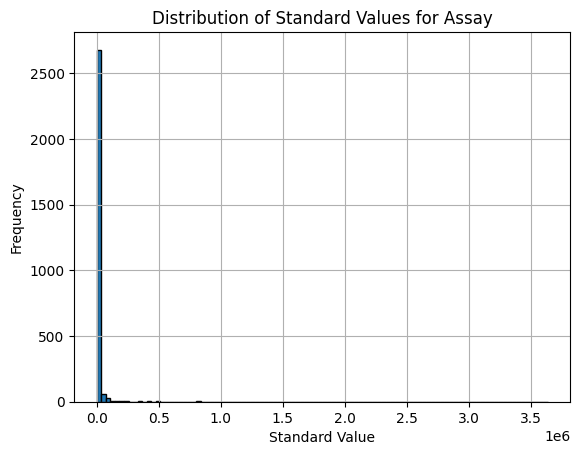

In [409]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
file_path = '/Users/martinnwadiugwu/Downloads/20231114_Data_Science_Class/data/gsk3b_all_assay_activity.csv'
df = pd.read_csv(file_path)

# Convert standard values to numeric, ignoring errors for non-numeric values
df['standard_value'] = pd.to_numeric(df['standard_value'], errors='coerce')

# Plotting
plt.hist(df['standard_value'].dropna(), bins=100, edgecolor='k')
plt.xlabel('Standard Value')
plt.ylabel('Frequency')
plt.title('Distribution of Standard Values for Assay')
plt.grid(True)
plt.show()


In [ ]:
# Choose assay from the bioactivities files with satisfactory number of active and inactive compounds tested

import ssl
from urllib.request import urlopen
import pandas as pd

# Load data from CSV file
file_path = '/Users/martinnwadiugwu/Downloads/20231114_Data_Science_Class/data/gsk3b_all_assay_activity.csv'

# Create an SSL context without certificate verification
ssl_context = ssl.create_default_context()
ssl_context.check_hostname = False
ssl_context.verify_mode = ssl.CERT_NONE

# Load the assay activity data
df_activities = pd.read_csv(file_path)

# Iterate over assays
for _, row in df_activities.iterrows():
    aid = row['activity_id']

    # Specify the PubChem assay URL
    url = f'https://pubchem.ncbi.nlm.nih.gov/rest/pug/assay/aid/{aid}/CSV'

    try:
        # Use the custom SSL context
        response = urlopen(url, context=ssl_context)

        # Read the CSV data into a DataFrame
        df_assay = pd.read_csv(response)

        # The first 5 rows can be removed
        df_assay = df_assay.iloc[5:, :]

        # Limit to columns necessary for modeling
        df_assay = df_assay[['PUBCHEM_CID', 'PUBCHEM_EXT_DATASOURCE_SMILES', 'PUBCHEM_ACTIVITY_OUTCOME']]

        # Check if the number of rows for each activity outcome is greater than 500
        outcome_counts = df_assay['PUBCHEM_ACTIVITY_OUTCOME'].value_counts()
        if all(outcome_counts > 500):
            # Display the DataFrame for the current assay
            print(f"\nData for Assay {aid}:")
            print(df_assay.head())  # You can modify this to suit your needs

            # Display value counts for 'PUBCHEM_ACTIVITY_OUTCOME'
            print("\nValue Counts for 'PUBCHEM_ACTIVITY_OUTCOME':")
            print(outcome_counts)

            # Print 'active' and 'inactive' rows
            active_inactive_rows = df_assay[df_assay['PUBCHEM_ACTIVITY_OUTCOME'].isin(['active', 'inactive'])]
            print("\nActive and Inactive Rows:")
            print(active_inactive_rows)

            # Sort values by activity to retain duplicates with active outcomes
            active_inactive_rows.sort_values(by='PUBCHEM_ACTIVITY_OUTCOME', inplace=True, ascending=False)
            active_inactive_rows.drop_duplicates(subset=['PUBCHEM_CID'], keep='first', inplace=True)

            # Remove entries with no SMILES
            active_inactive_rows.dropna(subset=['PUBCHEM_EXT_DATASOURCE_SMILES'], inplace=True)
            print("\nValue Counts after Processing:")
            print(active_inactive_rows['PUBCHEM_ACTIVITY_OUTCOME'].value_counts())

        else:
            print(f"\nAssay {aid} does not meet the criteria (>500 compounds for all outcomes).")
            print(outcome_counts)

    except Exception as e:
        print(f"Error processing assay {aid}: {e}")
        continue  # Skip to the next assay


In [410]:
import requests
import json

# Specify the assay AID
assay_aid = 651568

# Make a request to the PubChem API
url = f'https://pubchem.ncbi.nlm.nih.gov/rest/pug/assay/aid/{assay_aid}/summary/JSON'
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    try:
        # Try to parse the JSON response
        assay_info = json.loads(response.text)

        # Check if the response is a string (HTML error page)
        if isinstance(assay_info, str):
            print(f"Error: {assay_info}")
        else:
            # Check if there are assay summaries
            if 'AssaySummaries' in assay_info:
                # Loop through assay summaries
                for summary in assay_info['AssaySummaries']:
                    if isinstance(summary, dict):  # Check if summary is a dictionary
                        assay_name = summary.get('Assay', {}).get('Name')
                        if assay_name:
                            print(f"Assay Name: {assay_name}")
                    else:
                        print("Error: Unable to retrieve assay information.")
            else:
                print("No assay summaries found.")
    except json.JSONDecodeError:
        print("Error: Unable to parse JSON response.")
else:
    print(f"Error: Unable to retrieve assay information. Status code: {response.status_code}")


Error: Unable to retrieve assay information.


In [411]:
# Import necessary libraries
import ssl
import urllib.request
import pandas as pd

# Create an SSL context without certificate verification
ssl_context = ssl.create_default_context()
ssl_context.check_hostname = False
ssl_context.verify_mode = ssl.CERT_NONE

# Specify the PubChem assay URL for GSK-3b inhibition
url = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug/assay/aid/651568/CSV'

# Use the custom SSL context
response = urllib.request.urlopen(url, context=ssl_context)

# Read the CSV data into a DataFrame
df = pd.read_csv(response)

# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Print all column names
print("Column Names:", df.columns)

# Slice the DataFrame, select relevant columns, and rename them
#df = df[['PUBCHEM_CID', 'PUBCHEM_EXT_DATASOURCE_SMILES']]
#df.rename(columns={'PUBCHEM_CID': 'CID', 'PUBCHEM_EXT_DATASOURCE_SMILES': 'SMILES'}, inplace=True)

# Display the refined DataFrame
print("\nRefined DataFrame:")
print(df)

# Handle non-numeric values in the 'Ki' column
# Note: Replace 'AbsAC40_uM' with the correct column name representing the inhibition constant ('Ki')
if 'AbsAC40_uM' in df.columns:
    df['AbsAC40_uM'] = pd.to_numeric(df['AbsAC40_uM'], errors='coerce')

    # Remove rows with NaN values in the 'Ki' column
    df = df.dropna(subset=['AbsAC40_uM'])

    # Calculate pKi (commented out as 'Ki' is not explicitly defined in the provided columns)
    # df['pKi'] = -(np.log10(df['Ki']))

    # Sort the DataFrame by 'pKi' (commented out as 'pKi' is not explicitly defined)
    # df.sort_values(by='pKi', inplace=True, ascending=False)

    # Keep only the first occurrence of each unique 'CID'
    df.drop_duplicates(subset=['PUBCHEM_CID'], keep='first', inplace=True)

    # Print the final DataFrame
    print("\nFinal DataFrame:")
    print(df)

    # Print all column names after processing
    print("Final Column Names:", df.columns)
else:
    print("Column 'AbsAC40_uM' not found in the DataFrame.")


Original DataFrame:
                  PUBCHEM_RESULT_TAG  PUBCHEM_SID  PUBCHEM_CID  \
0                        RESULT_TYPE          NaN          NaN   
1                       RESULT_DESCR          NaN          NaN   
2                        RESULT_UNIT          NaN          NaN   
3     RESULT_IS_ACTIVE_CONCENTRATION          NaN          NaN   
4          RESULT_ATTR_CONC_MICROMOL          NaN          NaN   
...                              ...          ...          ...   
1224                            1220   26730871.0    2822848.0   
1225                            1221   26731465.0    2731986.0   
1226                            1222   26731489.0    2731987.0   
1227                            1223   26731605.0    2814551.0   
1228                            1224   26732598.0   10256643.0   

                          PUBCHEM_EXT_DATASOURCE_SMILES  \
0                                                   NaN   
1                                                   NaN   
2         

In [414]:
import ssl
import urllib.request
import pandas as pd
import numpy as np

# Create an SSL context without certificate verification
ssl_context = ssl.create_default_context()
ssl_context.check_hostname = False
ssl_context.verify_mode = ssl.CERT_NONE

# Specify the PubChem assay URL
url = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug/assay/aid/651568/CSV'

# Use the custom SSL context
response = urllib.request.urlopen(url, context=ssl_context)

# Read the CSV data into a DataFrame
df = pd.read_csv(response)

# Print all column names
print("Original Column Names:", df.columns)

# Slice the DataFrame, select relevant columns, and rename them
df = df[['PUBCHEM_RESULT_TAG', 'PUBCHEM_SID', 'PUBCHEM_CID',
         'PUBCHEM_EXT_DATASOURCE_SMILES', 'PUBCHEM_ACTIVITY_OUTCOME',
         'PUBCHEM_ACTIVITY_SCORE', 'PUBCHEM_ACTIVITY_URL',
         'PUBCHEM_ASSAYDATA_COMMENT', 'Phenotype', 'Potency', 'Efficacy',
         'Analysis Comment', 'Activity_Score', 'Curve_Description',
         'Fit_LogAC50', 'Fit_HillSlope', 'Fit_R2', 'Fit_InfiniteActivity',
         'Fit_ZeroActivity', 'Fit_CurveClass', 'Excluded_Points', 'Max_Response',
         'Activity at 0.00368 uM', 'Activity at 0.018 uM',
         'Activity at 0.092 uM', 'Activity at 0.460 uM', 'Activity at 2.300 uM',
         'Activity at 11.50 uM', 'Activity at 57.50 uM', 'Compound QC']]

# Rename the selected columns
df.rename(columns={'PUBCHEM_CID': 'CID', 'PUBCHEM_EXT_DATASOURCE_SMILES': 'SMILES', 'Potency': 'Ki'}, inplace=True)

# Handle non-numeric values in the 'Ki' column
df['Ki'] = pd.to_numeric(df['Ki'], errors='coerce')

# Remove rows with NaN values in the 'Ki' column
df = df.dropna(subset=['Ki'])

# Calculate pKi
df['pKi'] = -(np.log10(df['Ki']))

# Sort the DataFrame by 'pKi'
df.sort_values(by='pKi', inplace=True, ascending=False)

# Keep only the first occurrence of each unique 'CID'
df.drop_duplicates(subset=['CID'], keep='first', inplace=True)

# Print the final DataFrame
print("Final DataFrame:")
print(df)

# Print all column names after processing
print("Final Column Names:", df.columns)


Original Column Names: Index(['PUBCHEM_RESULT_TAG', 'PUBCHEM_SID', 'PUBCHEM_CID',
       'PUBCHEM_EXT_DATASOURCE_SMILES', 'PUBCHEM_ACTIVITY_OUTCOME',
       'PUBCHEM_ACTIVITY_SCORE', 'PUBCHEM_ACTIVITY_URL',
       'PUBCHEM_ASSAYDATA_COMMENT', 'Phenotype', 'Potency', 'Efficacy',
       'Analysis Comment', 'Activity_Score', 'Curve_Description',
       'Fit_LogAC50', 'Fit_HillSlope', 'Fit_R2', 'Fit_InfiniteActivity',
       'Fit_ZeroActivity', 'Fit_CurveClass', 'Excluded_Points', 'Max_Response',
       'Activity at 0.00368 uM', 'Activity at 0.018 uM',
       'Activity at 0.092 uM', 'Activity at 0.460 uM', 'Activity at 2.300 uM',
       'Activity at 11.50 uM', 'Activity at 57.50 uM', 'Compound QC'],
      dtype='object')
Final DataFrame:
     PUBCHEM_RESULT_TAG  PUBCHEM_SID         CID  \
874                 870   24824457.0   5260605.0   
220                 216    4246489.0   1192814.0   
1202               1198   26671540.0   1883291.0   
315                 311   17431886.0   1346013.0

In [415]:

#df.Ki = df.Ki.astype(float)
#df['pKi'] = -(np.log10(df.Ki))

#df.sort_values(by='pKi', inplace=True, ascending=False)
#df.drop_duplicates(subset=['CID'], keep='first', inplace=True)

In [416]:
df

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,CID,SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Phenotype,Ki,...,Max_Response,Activity at 0.00368 uM,Activity at 0.018 uM,Activity at 0.092 uM,Activity at 0.460 uM,Activity at 2.300 uM,Activity at 11.50 uM,Activity at 57.50 uM,Compound QC,pKi
874,870,24824457.0,5260605.0,C1C2=C(C(C3=CC4=C(C=C3N2)OCO4)C5=CC=C(C=C5)F)C...,Inconclusive,10.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Inhibitor,0.2685,...,-31.5907,1.4965,-3.4982,-0.5593,-21.744,-25.0776,-18.0012,-31.5907,QC'd by Key Organics Ltd.,0.571056
220,216,4246489.0,1192814.0,CCN1C2=C3C(=C(C=C2)S(=O)(=O)NC4=NC(=CS4)C)C=CC...,Inactive,0.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Activator,0.4775,...,-19.2093,2.147,1.5833,5.4672,29.7828,47.8175,56.5644,-19.2093,QC'd by Chem Div,0.321027
1202,1198,26671540.0,1883291.0,C1COCCN1C(=S)N=NC2=C(NC3=C2C=C(C=C3)Br)O,Inconclusive,10.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Inhibitor,0.5358,...,-19.48,-0.3554,1.5036,0.423,-10.3342,-40.2066,-21.2782,-19.48,NaN,0.270997
315,311,17431886.0,1346013.0,CC1=CC=C(C=C1)NS(=O)(=O)C2=C(C=CC(=C2)C3=NNC(=...,Inactive,0.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Activator,0.6746,...,-28.3016,-1.1711,7.8522,10.5361,25.8644,57.4486,60.4241,-28.3016,QC'd by ChemBridge,0.170954
955,951,87334183.0,17756907.0,COC1=CC(=CC(=C1OC)OC)C(CCN2CCOCC2)C3=C(C=C(C4=...,Inactive,0.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Activator,0.6746,...,-12.5405,-0.9328,-1.3532,3.4545,18.1698,53.747,54.5063,-12.5405,QC'd by Paul R Hanson - Univ. of Kansas - MLI ...,0.170954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,349,24788372.0,1782242.0,C1COCCN1C2=CC=C(O2)/C=C/3\C(=O)N(C(=O)N3)C4=CC...,Inconclusive,10.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Inhibitor,37.9330,...,-74.8372,0.7892,4.9049,3.9522,-0.1317,9.5279,7.8709,-74.8372,QC'd by ChemBridge,-1.579017
369,365,24800740.0,16192409.0,CC1=CC=C(C=C1)N2C=C(C(=N2)C3=CC=C(C=C3)F)CNCCC...,Inconclusive,10.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Inhibitor,37.9330,...,-35.7841,1.1763,0.758,0.344,1.189,-0.0994,5.3522,-35.7841,QC'd by ChemBridge,-1.579017
411,407,14733973.0,6870078.0,C1CC2=C(C1)NN=C2C(=O)N/N=C/C(=C\C3=CC=CC=C3)/Br,Inconclusive,10.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Inhibitor,37.9330,...,-80.8415,0.9945,6.024,-2.4339,1.7528,-6.8406,16.294,-80.8415,QC'd by DPISMR,-1.579017
429,425,14742764.0,4889526.0,CN1C2=CC=CC=C2N=C1C3=C(N(C4=NC5=CC=CC=C5N=C34)...,Inconclusive,10.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Inhibitor,37.9330,...,-51.38,-1.0844,-3.1506,0.4972,1.3304,6.844,6.4616,-51.38,QC'd by DPISMR,-1.579017


In [417]:
import numpy as np

# Keep only the first occurrence of each unique 'CID'
df.drop_duplicates(subset=['CID'], keep='first', inplace=True)


In [418]:
df

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,CID,SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Phenotype,Ki,...,Max_Response,Activity at 0.00368 uM,Activity at 0.018 uM,Activity at 0.092 uM,Activity at 0.460 uM,Activity at 2.300 uM,Activity at 11.50 uM,Activity at 57.50 uM,Compound QC,pKi
874,870,24824457.0,5260605.0,C1C2=C(C(C3=CC4=C(C=C3N2)OCO4)C5=CC=C(C=C5)F)C...,Inconclusive,10.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Inhibitor,0.2685,...,-31.5907,1.4965,-3.4982,-0.5593,-21.744,-25.0776,-18.0012,-31.5907,QC'd by Key Organics Ltd.,0.571056
220,216,4246489.0,1192814.0,CCN1C2=C3C(=C(C=C2)S(=O)(=O)NC4=NC(=CS4)C)C=CC...,Inactive,0.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Activator,0.4775,...,-19.2093,2.147,1.5833,5.4672,29.7828,47.8175,56.5644,-19.2093,QC'd by Chem Div,0.321027
1202,1198,26671540.0,1883291.0,C1COCCN1C(=S)N=NC2=C(NC3=C2C=C(C=C3)Br)O,Inconclusive,10.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Inhibitor,0.5358,...,-19.48,-0.3554,1.5036,0.423,-10.3342,-40.2066,-21.2782,-19.48,NaN,0.270997
315,311,17431886.0,1346013.0,CC1=CC=C(C=C1)NS(=O)(=O)C2=C(C=CC(=C2)C3=NNC(=...,Inactive,0.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Activator,0.6746,...,-28.3016,-1.1711,7.8522,10.5361,25.8644,57.4486,60.4241,-28.3016,QC'd by ChemBridge,0.170954
955,951,87334183.0,17756907.0,COC1=CC(=CC(=C1OC)OC)C(CCN2CCOCC2)C3=C(C=C(C4=...,Inactive,0.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Activator,0.6746,...,-12.5405,-0.9328,-1.3532,3.4545,18.1698,53.747,54.5063,-12.5405,QC'd by Paul R Hanson - Univ. of Kansas - MLI ...,0.170954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,349,24788372.0,1782242.0,C1COCCN1C2=CC=C(O2)/C=C/3\C(=O)N(C(=O)N3)C4=CC...,Inconclusive,10.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Inhibitor,37.9330,...,-74.8372,0.7892,4.9049,3.9522,-0.1317,9.5279,7.8709,-74.8372,QC'd by ChemBridge,-1.579017
369,365,24800740.0,16192409.0,CC1=CC=C(C=C1)N2C=C(C(=N2)C3=CC=C(C=C3)F)CNCCC...,Inconclusive,10.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Inhibitor,37.9330,...,-35.7841,1.1763,0.758,0.344,1.189,-0.0994,5.3522,-35.7841,QC'd by ChemBridge,-1.579017
411,407,14733973.0,6870078.0,C1CC2=C(C1)NN=C2C(=O)N/N=C/C(=C\C3=CC=CC=C3)/Br,Inconclusive,10.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Inhibitor,37.9330,...,-80.8415,0.9945,6.024,-2.4339,1.7528,-6.8406,16.294,-80.8415,QC'd by DPISMR,-1.579017
429,425,14742764.0,4889526.0,CN1C2=CC=CC=C2N=C1C3=C(N(C4=NC5=CC=CC=C5N=C34)...,Inconclusive,10.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Inhibitor,37.9330,...,-51.38,-1.0844,-3.1506,0.4972,1.3304,6.844,6.4616,-51.38,QC'd by DPISMR,-1.579017


In [419]:
df['PUBCHEM_ACTIVITY_OUTCOME'].value_counts()

Inconclusive    188
Active           56
Inactive         37
Name: PUBCHEM_ACTIVITY_OUTCOME, dtype: int64

In [420]:
df.rename(columns={'PUBCHEM_CID': 'CID', 'PUBCHEM_EXT_DATASOURCE_SMILES': 'SMILES', 'PUBCHEM_ACTIVITY_OUTCOME': 'ACTIVITY'}, 
         inplace=True)

df.drop(df[df['ACTIVITY'] == 'Inconclusive'].index, inplace=True)

df

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,CID,SMILES,ACTIVITY,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Phenotype,Ki,...,Max_Response,Activity at 0.00368 uM,Activity at 0.018 uM,Activity at 0.092 uM,Activity at 0.460 uM,Activity at 2.300 uM,Activity at 11.50 uM,Activity at 57.50 uM,Compound QC,pKi
220,216,4246489.0,1192814.0,CCN1C2=C3C(=C(C=C2)S(=O)(=O)NC4=NC(=CS4)C)C=CC...,Inactive,0.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Activator,0.4775,...,-19.2093,2.147,1.5833,5.4672,29.7828,47.8175,56.5644,-19.2093,QC'd by Chem Div,0.321027
315,311,17431886.0,1346013.0,CC1=CC=C(C=C1)NS(=O)(=O)C2=C(C=CC(=C2)C3=NNC(=...,Inactive,0.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Activator,0.6746,...,-28.3016,-1.1711,7.8522,10.5361,25.8644,57.4486,60.4241,-28.3016,QC'd by ChemBridge,0.170954
955,951,87334183.0,17756907.0,COC1=CC(=CC(=C1OC)OC)C(CCN2CCOCC2)C3=C(C=C(C4=...,Inactive,0.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Activator,0.6746,...,-12.5405,-0.9328,-1.3532,3.4545,18.1698,53.747,54.5063,-12.5405,QC'd by Paul R Hanson - Univ. of Kansas - MLI ...,0.170954
34,30,17508357.0,801114.0,CCC1=C(N2C3=CC=CC=C3N=C2C(=C1C)C#N)Cl,Active,88.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Inhibitor,0.9528,...,-101.844,1.4266,5.7175,0.4532,-26.7549,-79.7332,-101.529,-101.844,QC'd by Asinex Ltd.,0.020998
282,278,49731730.0,20959120.0,CC1=C(C=C(C=C1)C2=CN=C(O2)C3CC3)S(=O)(=O)NC4=C...,Inactive,0.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Activator,1.0691,...,31.4101,5.0086,-1.0289,-1.5656,7.6062,37.6982,58.4864,31.4101,QC'd by Chem Div,-0.029018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,790,17513928.0,5534431.0,COC1=CC=C(C=C1)/C=N/NC(=O)CCN2C=NC(=C2C3=CC=CC...,Active,40.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Inhibitor,26.8545,...,-75.796,4.9771,5.4644,5.5909,-2.758,-0.6835,-16.8556,-75.796,QC'd by InterBioScreen,-1.429017
785,781,17513630.0,951254.0,CC1=CC(=CC=C1)N2C3=C(C=C(C=C3)[N+](=O)[O-])C=C...,Active,40.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Inhibitor,26.8545,...,-92.1511,1.4223,-0.7631,0.9897,0.8996,-11.7861,-17.6759,-92.1511,QC'd by InterBioScreen,-1.429017
766,762,85272972.0,21575335.0,C[C@H]1C[C@H]1C2=N[C@@H](CS2)/C=C\CC/C=C/C=C/C...,Active,40.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Inhibitor,30.1313,...,-71.4427,5.2394,-7.9138,-1.1246,-7.2663,-9.4037,-18.3192,-71.4427,QC'd by Hendrik Luesch - Univ. of Florida - ML...,-1.479018
1067,1063,22412858.0,1214472.0,CCCC1=NC(=C(N1CC(C)C)S(=O)(=O)C2=CC=CC=C2)[N+]...,Active,40.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Inhibitor,30.1313,...,-90.4649,-0.3327,-2.0338,0.7815,-1.416,-1.9707,-19.8526,-90.4649,QC'd by Specs,-1.479018


In [421]:
conditions = [(df['ACTIVITY'] == 'Active'), (df['ACTIVITY'] == 'Inactive')]
values = [1, 0]
df['ACTIVITY'] = np.select(conditions, values)

df

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,CID,SMILES,ACTIVITY,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Phenotype,Ki,...,Max_Response,Activity at 0.00368 uM,Activity at 0.018 uM,Activity at 0.092 uM,Activity at 0.460 uM,Activity at 2.300 uM,Activity at 11.50 uM,Activity at 57.50 uM,Compound QC,pKi
220,216,4246489.0,1192814.0,CCN1C2=C3C(=C(C=C2)S(=O)(=O)NC4=NC(=CS4)C)C=CC...,0,0.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Activator,0.4775,...,-19.2093,2.147,1.5833,5.4672,29.7828,47.8175,56.5644,-19.2093,QC'd by Chem Div,0.321027
315,311,17431886.0,1346013.0,CC1=CC=C(C=C1)NS(=O)(=O)C2=C(C=CC(=C2)C3=NNC(=...,0,0.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Activator,0.6746,...,-28.3016,-1.1711,7.8522,10.5361,25.8644,57.4486,60.4241,-28.3016,QC'd by ChemBridge,0.170954
955,951,87334183.0,17756907.0,COC1=CC(=CC(=C1OC)OC)C(CCN2CCOCC2)C3=C(C=C(C4=...,0,0.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Activator,0.6746,...,-12.5405,-0.9328,-1.3532,3.4545,18.1698,53.747,54.5063,-12.5405,QC'd by Paul R Hanson - Univ. of Kansas - MLI ...,0.170954
34,30,17508357.0,801114.0,CCC1=C(N2C3=CC=CC=C3N=C2C(=C1C)C#N)Cl,1,88.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Inhibitor,0.9528,...,-101.844,1.4266,5.7175,0.4532,-26.7549,-79.7332,-101.529,-101.844,QC'd by Asinex Ltd.,0.020998
282,278,49731730.0,20959120.0,CC1=C(C=C(C=C1)C2=CN=C(O2)C3CC3)S(=O)(=O)NC4=C...,0,0.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Activator,1.0691,...,31.4101,5.0086,-1.0289,-1.5656,7.6062,37.6982,58.4864,31.4101,QC'd by Chem Div,-0.029018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,790,17513928.0,5534431.0,COC1=CC=C(C=C1)/C=N/NC(=O)CCN2C=NC(=C2C3=CC=CC...,1,40.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Inhibitor,26.8545,...,-75.796,4.9771,5.4644,5.5909,-2.758,-0.6835,-16.8556,-75.796,QC'd by InterBioScreen,-1.429017
785,781,17513630.0,951254.0,CC1=CC(=CC=C1)N2C3=C(C=C(C=C3)[N+](=O)[O-])C=C...,1,40.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Inhibitor,26.8545,...,-92.1511,1.4223,-0.7631,0.9897,0.8996,-11.7861,-17.6759,-92.1511,QC'd by InterBioScreen,-1.429017
766,762,85272972.0,21575335.0,C[C@H]1C[C@H]1C2=N[C@@H](CS2)/C=C\CC/C=C/C=C/C...,1,40.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Inhibitor,30.1313,...,-71.4427,5.2394,-7.9138,-1.1246,-7.2663,-9.4037,-18.3192,-71.4427,QC'd by Hendrik Luesch - Univ. of Florida - ML...,-1.479018
1067,1063,22412858.0,1214472.0,CCCC1=NC(=C(N1CC(C)C)S(=O)(=O)C2=CC=CC=C2)[N+]...,1,40.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Inhibitor,30.1313,...,-90.4649,-0.3327,-2.0338,0.7815,-1.416,-1.9707,-19.8526,-90.4649,QC'd by Specs,-1.479018


In [422]:
# Sort values by activity to retain duplicates with active outcomes
df.sort_values(by='ACTIVITY', inplace=True, ascending=False)
df.drop_duplicates(subset=['CID'], keep='first', inplace=True)

# Remove entries with no SMILES
df.dropna(subset=['SMILES'], inplace=True)
df

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,CID,SMILES,ACTIVITY,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Phenotype,Ki,...,Max_Response,Activity at 0.00368 uM,Activity at 0.018 uM,Activity at 0.092 uM,Activity at 0.460 uM,Activity at 2.300 uM,Activity at 11.50 uM,Activity at 57.50 uM,Compound QC,pKi
749,745,85269712.0,2313778.0,C1=CC=C(C(=C1)/C=C\2/C(=O)N(C(=S)S2)CCCC(=O)NC...,1,40.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Inhibitor,30.1313,...,-70.5882,-0.0519,1.704,-3.1556,2.4704,-9.8335,-11.746,-70.5882,QC'd by Enamine,-1.479018
1037,1033,856002.0,3194.0,C1=CC=C(C=C1)N2C(=O)C3=CC=CC=C3[Se]2,1,42.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Inhibitor,15.1014,...,-104.54,6.67,4.5421,4.1431,1.8689,6.0042,-42.0028,-104.54,QC'd by Sigma Chemical Company,-1.179017
852,848,85272351.0,6479089.0,CC1(C(CC2=C(C=CC(=C2O1)C(=O)/C=C/C3=CC=C(C=C3)...,1,41.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Inhibitor,23.9341,...,-77.4769,10.3773,3.668,2.1644,-1.7231,-8.6639,-23.3998,-77.4769,QC'd by K H Lee - Univ. of North Carolina - ML...,-1.379017
1039,1035,14727718.0,6552077.0,COC(=O)[C@@H]1[C@H](C2(C3=CC=CC=C3C4=CC=CC=C42...,1,84.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Inhibitor,4.7755,...,-92.4475,-1.1109,4.481,1.9602,-3.6073,-16.3197,-79.1019,-92.4475,QC'd by Specs,-0.679019
808,804,49646965.0,1390982.0,COC1=CC=CC=C1C(=O)NC2=CC=CC=C2SC(=O)C3=CC=CC=C3OC,1,41.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Inhibitor,23.9341,...,-87.9703,3.9086,-0.3076,2.1895,-10.0673,-12.7346,-30.6346,-87.9703,QC'd by InterBioScreen,-1.379017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,891,49680195.0,5357627.0,CC1=C(C(=O)OC2=C1C=CC(=C2)O)C3=CC=C(C=C3)OC,0,0.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Activator,7.5686,...,7.0792,2.8292,4.555,2.5559,1.2304,3.2645,32.1006,7.0792,QC'd by Life Chemicals,-0.879016
588,584,22401740.0,5009283.0,COC1=C(C=C(C=C1)S(=O)(=O)N2CCCCC2)NS(=O)(=O)C3...,0,0.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Activator,7.5686,...,32.1665,2.5933,4.0092,4.2326,5.2509,1.3113,27.5467,32.1665,QC'd by Enamine,-0.879016
1213,1209,26727602.0,9580312.0,CC1=C(C=C(C=C1)Cl)NC(=S)N/N=C/C2=CC=CC3=CC=CC=C32,0,0.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Activator,7.5686,...,31.9143,4.2911,4.4123,-13.6221,4.0037,-0.2092,26.0444,31.9143,NaN,-0.879016
315,311,17431886.0,1346013.0,CC1=CC=C(C=C1)NS(=O)(=O)C2=C(C=CC(=C2)C3=NNC(=...,0,0.0,http://assay.nih.gov/htsws/rest/display/ikappa...,NaN,Activator,0.6746,...,-28.3016,-1.1711,7.8522,10.5361,25.8644,57.4486,60.4241,-28.3016,QC'd by ChemBridge,0.170954


In [423]:
df['ACTIVITY'].value_counts()

1    56
0    37
Name: ACTIVITY, dtype: int64

In [86]:
# Save to a csv file
df.to_csv('AID_651568_updated.csv', index=False)

In [424]:

# Slice the DataFrame, select relevant columns, and rename them
df = df[['CID', 'SMILES', 'ACTIVITY', 'Ki','pKi', 'Fit_LogAC50']]

# Display the DataFrame
df


,CID,SMILES,ACTIVITY,Ki,pKi,Fit_LogAC50
749,2313778.0,C1=CC=C(C(=C1)/C=C\2/C(=O)N(C(=S)S2)CCCC(=O)NC...,1,30.1313,-1.479018,-4.521
1037,3194.0,C1=CC=C(C=C1)N2C(=O)C3=CC=CC=C3[Se]2,1,15.1014,-1.179017,-4.821
852,6479089.0,CC1(C(CC2=C(C=CC(=C2O1)C(=O)/C=C/C3=CC=C(C=C3)...,1,23.9341,-1.379017,-4.621
1039,6552077.0,COC(=O)[C@@H]1[C@H](C2(C3=CC=CC=C3C4=CC=CC=C42...,1,4.7755,-0.679019,-5.321
808,1390982.0,COC1=CC=CC=C1C(=O)NC2=CC=CC=C2SC(=O)C3=CC=CC=C3OC,1,23.9341,-1.379017,-4.621
...,...,...,...,...,...,...
895,5357627.0,CC1=C(C(=O)OC2=C1C=CC(=C2)O)C3=CC=C(C=C3)OC,0,7.5686,-0.879016,-5.121
588,5009283.0,COC1=C(C=C(C=C1)S(=O)(=O)N2CCCCC2)NS(=O)(=O)C3...,0,7.5686,-0.879016,-5.121
1213,9580312.0,CC1=C(C=C(C=C1)Cl)NC(=S)N/N=C/C2=CC=CC3=CC=CC=C32,0,7.5686,-0.879016,-5.121
315,1346013.0,CC1=CC=C(C=C1)NS(=O)(=O)C2=C(C=CC(=C2)C3=NNC(=...,0,0.6746,0.170954,-6.171


In [180]:
# Save to a csv file
df.to_csv('AID_651568_new_update.csv', index=False)

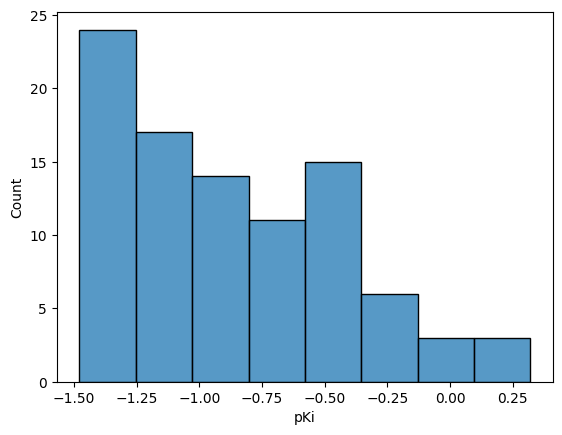

In [425]:
#histogram showing the distribution of pKi values
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df.pKi)

plt.savefig('AID_651568_histplot.png')

plt.show()

In [426]:
#Load dataset containing compound SMILES using Pandas
import pandas as pd
from rdkit import Chem

# 1.1 Read the CompoundWithSIMLES.csv dataset (same as the homework)
print(data.head())


            PUBCHEM_RESULT_TAG  PUBCHEM_SID  \
CID                                           
1214472.0                 1063   22412858.0   
686057.0                   399   14724991.0   
12005312.0                 174   17510686.0   
2313778.0                  745   85269712.0   
801114.0                    30   17508357.0   

                                                       SMILES  ACTIVITY  \
CID                                                                       
1214472.0   CCCC1=NC(=C(N1CC(C)C)S(=O)(=O)C2=CC=CC=C2)[N+]...         1   
686057.0         C1=CC2=C(C(=C(C=C2Cl)Cl)OC(=O)C3=CC=CO3)N=C1         1   
12005312.0  CCCC(=O)OCCNC1=C(C2=NON=C2C(=C1)SC3=NC=CN3C)[N...         1   
2313778.0   C1=CC=C(C(=C1)/C=C\2/C(=O)N(C(=S)S2)CCCC(=O)NC...         1   
801114.0                CCC1=C(N2C3=CC=CC=C3N=C2C(=C1C)C#N)Cl         1   

            PUBCHEM_ACTIVITY_SCORE  \
CID                                  
1214472.0                     40.0   
686057.0                      

In [427]:
data = pd.read_csv('AID_651568_new_update.csv', index_col=["CID"])


In [428]:
# Generate machine-readable descriptors of compounds for modeling
# we will use the RDKit library to calculate molecular descriptors for the created RDKit molecular objects and store these descriptors in a new DataFrame

# Load dataset containing compound SMILES using Pandas
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors, Crippen
from rdkit.ML.Descriptors import MoleculeDescriptors

# Create RDKit molecular objects based on SMILES
mol_objects = [Chem.MolFromSmiles(smiles) for smiles in data['SMILES']]

# Calculate RDKit descriptors
calc = MoleculeDescriptors.MolecularDescriptorCalculator([desc[0] for desc in Descriptors.descList])
descriptors = pd.DataFrame([calc.CalcDescriptors(mol) for mol in mol_objects], columns=calc.GetDescriptorNames(), index=data.index)

# Calculate logP using RDKit's Crippen method
descriptors['logP'] = [Crippen.MolLogP(mol) for mol in mol_objects]

# Calculate other descriptors related to distribution and permeability
# For example, you can use the ALOGP descriptor for lipophilicity
descriptors['ALOGP'] = [Crippen.MolMR(mol) for mol in mol_objects]

# Calculate a simplified version of log BB using a combination of descriptors
# Note: This is just an example; you may need to adapt based on your specific requirements
descriptors['logBB'] = descriptors['ALOGP'] - descriptors['logP']

# Display the DataFrame with descriptors and log BB
print(descriptors)


           MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  \
CID                                                               
1214472.0          13.013711       13.013711           0.028754   
5734791.0          13.917719       13.917719           0.080420   
1390982.0          12.752490       12.752490           0.169962   
6552077.0          12.933808       12.933808           0.540813   
6479089.0          12.729575       12.729575           0.173046   
...                      ...             ...                ...   
5357627.0          12.240671       12.240671           0.071525   
9580312.0           6.006856        6.006856           0.413753   
5009283.0          12.942769       12.942769           0.012383   
1346013.0          13.019257       13.019257           0.159867   
3573345.0           5.182142        5.182142           0.616088   

           MinEStateIndex       qed    MolWt  HeavyAtomMolWt  ExactMolWt  \
CID                                                 

In [215]:
descriptors.to_csv('descriptors2.csv')

In [429]:
# 2.4 Scale the descriptors DataFrame using scikit-learn's StandardScaler
from sklearn.preprocessing import StandardScaler

# (1) Initialize StandardScaler object
scaler = StandardScaler()

# (2) Fit the StandardScaler to the data of descriptors 
# (compute the mean and standard deviation of each descriptor for scaling)
scaler.fit(descriptors)

# (3) Scale descriptor values using the fitted StandardScaler
standard_desc = scaler.transform(descriptors)

# (4) Store the scaled descriptors in a new dataframe
scaled_descriptors = pd.DataFrame(standard_desc, index=descriptors.index, columns=descriptors.columns)
scaled_descriptors.head()


,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,logP,ALOGP,logBB
CID,,,,,,,,,,,,,,,,,,,,,
1214472.0,0.598602,0.598602,-0.864445,-1.536033,-0.060361,-0.170289,-0.223301,-0.167758,0.009966,0.0,...,0.0,0.0,-0.225494,0.0,-0.238366,-0.212,0.0,-0.416269,-0.382138,-0.370179
5734791.0,0.983090,0.983090,-0.533847,0.391847,-2.166793,1.177240,1.200624,1.180530,1.342339,0.0,...,0.0,0.0,-0.225494,0.0,-0.238366,-0.212,0.0,1.206984,1.110452,1.075826
1390982.0,0.487501,0.487501,0.039113,0.647140,0.169917,0.322133,0.331719,0.324329,0.357542,0.0,...,0.0,0.0,-0.225494,0.0,-0.238366,-0.212,0.0,1.126138,0.532546,0.489768
6552077.0,0.564619,0.564619,2.412098,0.171427,-0.803564,0.877694,0.954650,0.875291,0.763046,0.0,...,0.0,0.0,-0.225494,0.0,-0.238366,-0.212,0.0,0.730347,0.898084,0.881835
6479089.0,0.477755,0.477755,0.058844,0.361540,0.429405,-0.135450,-0.198531,-0.132340,0.183754,0.0,...,0.0,0.0,-0.225494,0.0,-0.238366,-0.212,0.0,-0.287083,0.022566,0.036764


In [430]:
#Machine learning modeling using calculated descriptors
# Prepare the training sets for both the scaled_descriptors and the target endpoint (logBB)

X = scaled_descriptors
y = data['ACTIVITY']
y

CID
1214472.0    1
5734791.0    1
1390982.0    1
6552077.0    1
6479089.0    1
            ..
5357627.0    0
9580312.0    0
5009283.0    0
1346013.0    0
3573345.0    0
Name: ACTIVITY, Length: 93, dtype: int64

In [433]:
# Import necessary libraries
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Read the descriptors from the CSV file
descriptors = pd.read_csv('descriptors2.csv', index_col=0)

# Assuming you have already loaded your dataset into a variable named 'data'
# Print missing values in the original data
print("Missing Values in Original Data:")
print(data.isnull().sum())

# Check for Missing Values in Descriptors
print("\nMissing Values in Descriptors Before Imputation:")
print(descriptors.isnull().sum())

# Impute missing values in descriptors with mean
imputer = SimpleImputer(strategy='mean')
descriptors_imputed = imputer.fit_transform(descriptors)

# Check for Missing Values in Target Variable
print("\nMissing Values in Target Variable:")
print(data['ACTIVITY'].isnull().sum())

# Drop rows with missing values in the target variable
data_cleaned = data.dropna(subset=['ACTIVITY'])

# Create a DataFrame for the target variable 'ACTIVITY'
target = data_cleaned['ACTIVITY']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(descriptors_imputed, target, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Logistic Regression model for classification
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the classification model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Missing Values in Original Data:
SMILES         0
ACTIVITY       0
Ki             0
pKi            0
Fit_LogAC50    0
dtype: int64

Missing Values in Descriptors Before Imputation:
MaxAbsEStateIndex    0
MaxEStateIndex       0
MinAbsEStateIndex    0
MinEStateIndex       0
qed                  0
                    ..
fr_unbrch_alkane     0
fr_urea              0
logP                 0
ALOGP                0
logBB                0
Length: 212, dtype: int64

Missing Values in Target Variable:
0

Accuracy: 0.8421052631578947

Confusion Matrix:
[[ 4  1]
 [ 2 12]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.92      0.86      0.89        14

    accuracy                           0.84        19
   macro avg       0.79      0.83      0.81        19
weighted avg       0.86      0.84      0.85        19



In [435]:
# Import necessary libraries
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Read the descriptors from the CSV file
descriptors = pd.read_csv('descriptors2.csv', index_col=0)

# Assuming you have already loaded your dataset into a variable named 'data'
# Print missing values in the original data
print("Missing Values in Original Data:")
print(data.isnull().sum())

# Check for Missing Values in Descriptors
print("\nMissing Values in Descriptors Before Imputation:")
print(descriptors.isnull().sum())

# Impute missing values in descriptors with mean
imputer = SimpleImputer(strategy='mean')
descriptors_imputed = imputer.fit_transform(descriptors)

# Check for Missing Values in Target Variable
print("\nMissing Values in Target Variable:")
print(data['ACTIVITY'].isnull().sum())

# Drop rows with missing values in the target variable
data_cleaned = data.dropna(subset=['ACTIVITY'])

# Create a DataFrame for the target variable 'ACTIVITY'
target = data_cleaned['ACTIVITY']

# Split the data into training, validation, and test sets
# Here, we use a 70-15-15 split
X_train, X_temp, y_train, y_temp = train_test_split(descriptors_imputed, target, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Create a Logistic Regression model for classification
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the validation data
y_val_pred = model.predict(X_val_scaled)

# Evaluate the classification model on validation data
accuracy_val = accuracy_score(y_val, y_val_pred)
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
classification_rep_val = classification_report(y_val, y_val_pred)

print("\nAccuracy on Validation Set:", accuracy_val)
print("\nConfusion Matrix on Validation Set:")
print(conf_matrix_val)
print("\nClassification Report on Validation Set:")
print(classification_rep_val)

# Make predictions on the test data
y_test_pred = model.predict(X_test_scaled)

# Evaluate the classification model on test data
accuracy_test = accuracy_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
classification_rep_test = classification_report(y_test, y_test_pred)

print("\nAccuracy on Test Set:", accuracy_test)
print("\nConfusion Matrix on Test Set:")
print(conf_matrix_test)
print("\nClassification Report on Test Set:")
print(classification_rep_test)


Missing Values in Original Data:
SMILES         0
ACTIVITY       0
Ki             0
pKi            0
Fit_LogAC50    0
dtype: int64

Missing Values in Descriptors Before Imputation:
MaxAbsEStateIndex    0
MaxEStateIndex       0
MinAbsEStateIndex    0
MinEStateIndex       0
qed                  0
                    ..
fr_unbrch_alkane     0
fr_urea              0
logP                 0
ALOGP                0
logBB                0
Length: 212, dtype: int64

Missing Values in Target Variable:
0

Accuracy on Validation Set: 0.8571428571428571

Confusion Matrix on Validation Set:
[[5 1]
 [1 7]]

Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.88      0.88      0.88         8

    accuracy                           0.86        14
   macro avg       0.85      0.85      0.85        14
weighted avg       0.86      0.86      0.86        14


Accuracy on Test Set: 0.92857142

In [241]:
# Print the coefficients (variable importance)
print("\nCoefficients (Variable Importance):")
coefficients = model.coef_[0]
feature_names = descriptors.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
print(coef_df)



Coefficients (Variable Importance):
                   Feature  Coefficient
175              fr_ketone     0.528705
168             fr_halogen     0.476972
188  fr_para_hydroxylation     0.474608
150        fr_allylic_oxid     0.441470
171           fr_imidazole     0.427441
..                     ...          ...
154         fr_aryl_methyl    -0.432591
24            BCUT2D_MRLOW    -0.458135
23             BCUT2D_MRHI    -0.474636
204            fr_thiazole    -0.582733
89             EState_VSA5    -0.587742

[212 rows x 2 columns]


Missing Values in Original Data:
SMILES         0
ACTIVITY       0
Ki             0
pKi            0
Fit_LogAC50    0
dtype: int64

Missing Values in Descriptors Before Imputation:
MaxAbsEStateIndex    0
MaxEStateIndex       0
MinAbsEStateIndex    0
MinEStateIndex       0
qed                  0
                    ..
fr_unbrch_alkane     0
fr_urea              0
logP                 0
ALOGP                0
logBB                0
Length: 212, dtype: int64
Missing Values in Original Data:
SMILES         0
ACTIVITY       0
Ki             0
pKi            0
Fit_LogAC50    0
dtype: int64

Missing Values in Target Variable:
0

Logistic Regression Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.88      0.88      0.88         8

    accuracy                           0.86        14
   macro avg       0.85      0.85      0.85        14
weighted avg       0.86      0.86     

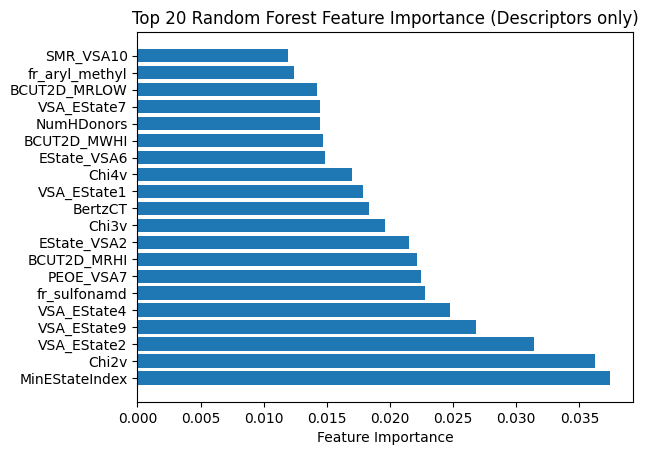


Coefficients (Variable Importance):
                   Feature  Coefficient
175              fr_ketone     0.528705
168             fr_halogen     0.476972
188  fr_para_hydroxylation     0.474608
150        fr_allylic_oxid     0.441470
171           fr_imidazole     0.427441
..                     ...          ...
154         fr_aryl_methyl    -0.432591
24            BCUT2D_MRLOW    -0.458135
23             BCUT2D_MRHI    -0.474636
204            fr_thiazole    -0.582733
89             EState_VSA5    -0.587742

[212 rows x 2 columns]

Logistic Regression Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.90      0.95        10

    accuracy                           0.93        14
   macro avg       0.90      0.95      0.92        14
weighted avg       0.94      0.93      0.93        14


K-Nearest Neighbors Classification Report (Test Set):
              precisio

In [439]:
# Import necessary libraries
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into a variable named 'data'
# Print missing values in the original data
print("Missing Values in Original Data:")
print(data.isnull().sum())

# Read the descriptors from the CSV file
descriptors = pd.read_csv('descriptors2.csv', index_col=0)

# Check for Missing Values in Descriptors
print("\nMissing Values in Descriptors Before Imputation:")
print(descriptors.isnull().sum())

# Impute missing values in descriptors with mean
imputer = SimpleImputer(strategy='mean')
descriptors_imputed = imputer.fit_transform(descriptors)

# Assuming you have already loaded your dataset into a variable named 'data'
# Print missing values in the original data
print("Missing Values in Original Data:")
print(data.isnull().sum())

# Check for Missing Values in Target Variable
print("\nMissing Values in Target Variable:")
print(data['ACTIVITY'].isnull().sum())

# Drop rows with missing values in the target variable
data_cleaned = data.dropna(subset=['ACTIVITY'])

# Create a DataFrame for the target variable 'ACTIVITY'
target = data_cleaned['ACTIVITY']

# Split the data into training, validation, and test sets
# Here, we use a 70-15-15 split
X_train, X_temp, y_train, y_temp = train_test_split(descriptors_imputed, target, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


# Create models
log_model = LogisticRegression(random_state=123)
knn_model = KNeighborsClassifier()
rf_model = RandomForestClassifier(random_state=123)
svm_model = SVC(random_state=123)
xgb_model = XGBClassifier(random_state=123)

# Train models
log_model.fit(X_train_scaled, y_train)
knn_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)
svm_model.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
log_pred = log_model.predict(X_val_scaled)
knn_pred = knn_model.predict(X_val_scaled)
rf_pred = rf_model.predict(X_val_scaled)
svm_pred = svm_model.predict(X_val_scaled)
xgb_pred = xgb_model.predict(X_val_scaled)

# Combine predictions using majority voting
ensemble_pred = (log_pred + knn_pred + rf_pred + svm_pred + xgb_pred) >= 2

# Evaluate the performance of each model on validation set

print("\nLogistic Regression Classification Report (Validation Set):")
print(classification_report(y_val, log_pred))

print("\nK-Nearest Neighbors Classification Report (Validation Set):")
print(classification_report(y_val, knn_pred))

print("\nRandom Forest Classification Report (Validation Set):")
print(classification_report(y_val, rf_pred))

print("\nSupport Vector Machine Classification Report (Validation Set):")
print(classification_report(y_val, svm_pred))

print("\nXGBoost Classification Report (Validation Set):")
print(classification_report(y_val, xgb_pred))

print("\nEnsemble Model Classification Report (Validation Set):")
print(classification_report(y_val, ensemble_pred))

# Print feature importance for Random Forest
print("\nRandom Forest Feature Importance:")
print(rf_model.feature_importances_)

# Plot feature importance for the top 10 features
feature_importance = rf_model.feature_importances_
feature_names = descriptors.columns
top_10_indices = feature_importance.argsort()[-20:][::-1]

plt.barh(feature_names[top_10_indices], feature_importance[top_10_indices])
plt.xlabel('Feature Importance')
plt.title('Top 20 Random Forest Feature Importance (Descriptors only)')
plt.show()

# Print the coefficients (variable importance)
print("\nCoefficients (Variable Importance):")
coefficients = model.coef_[0]
feature_names = descriptors.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
print(coef_df)


# Evaluate the performance of each model on the test set
log_test_pred = log_model.predict(X_test_scaled)
knn_test_pred = knn_model.predict(X_test_scaled)
rf_test_pred = rf_model.predict(X_test_scaled)
svm_test_pred = svm_model.predict(X_test_scaled)
xgb_test_pred = xgb_model.predict(X_test_scaled)
ensemble_test_pred = (log_test_pred + knn_test_pred + rf_test_pred + svm_test_pred + xgb_test_pred) >= 2

# Evaluate the performance of each model on test set
print("\nLogistic Regression Classification Report (Test Set):")
print(classification_report(y_test, log_test_pred))

print("\nK-Nearest Neighbors Classification Report (Test Set):")
print(classification_report(y_test, knn_test_pred))

print("\nRandom Forest Classification Report (Test Set):")
print(classification_report(y_test, rf_test_pred))

print("\nSupport Vector Machine Classification Report (Test Set):")
print(classification_report(y_test, svm_test_pred))

print("\nXGBoost Classification Report (Test Set):")
print(classification_report(y_test, xgb_test_pred))

print("\nEnsemble Model Classification Report (Test Set):")
print(classification_report(y_test, ensemble_test_pred))


In [440]:
X_test.shape

(14, 212)


Missing Values in Descriptors Before Imputation:
MaxAbsEStateIndex       0
MaxEStateIndex          0
MinAbsEStateIndex       0
MinEStateIndex          0
qed                     0
                       ..
Activity at 0.460 uM    0
Activity at 2.300 uM    0
Activity at 11.50 uM    0
Activity at 57.50 uM    0
pKi                     0
Length: 232, dtype: int64
Missing Values in Original Data:
PUBCHEM_RESULT_TAG            0
PUBCHEM_SID                   0
SMILES                        0
ACTIVITY                      0
PUBCHEM_ACTIVITY_SCORE        0
PUBCHEM_ACTIVITY_URL          0
PUBCHEM_ASSAYDATA_COMMENT    93
Phenotype                     0
Ki                            0
Efficacy                      0
Analysis Comment             93
Activity_Score                0
Curve_Description             0
Fit_LogAC50                   0
Fit_HillSlope                 0
Fit_R2                        0
Fit_InfiniteActivity          0
Fit_ZeroActivity              0
Fit_CurveClass               

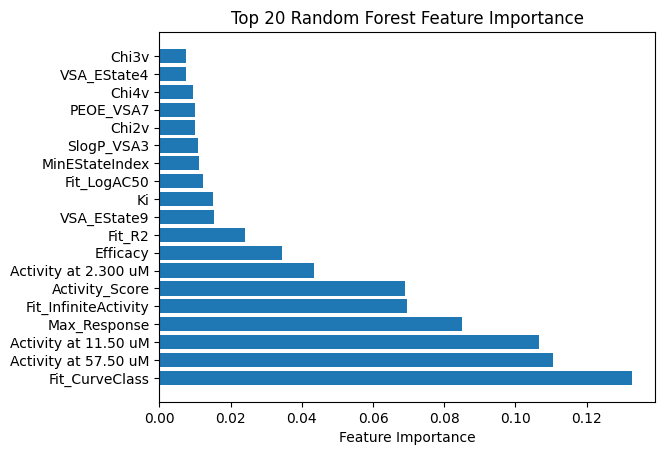


Coefficients (Variable Importance):
                  Feature  Coefficient
215              Efficacy     0.443804
216        Activity_Score     0.426760
212                    Ki     0.196372
175             fr_ketone     0.161598
217           Fit_LogAC50     0.159396
..                    ...          ...
229  Activity at 11.50 uM    -0.404912
220  Fit_InfiniteActivity    -0.509190
223          Max_Response    -0.510875
230  Activity at 57.50 uM    -0.510875
222        Fit_CurveClass    -0.550298

[232 rows x 2 columns]

Logistic Regression Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        10

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14


K-Nearest Neighbors Classification Report (Test Set):
              precision    recall 

In [447]:
# Import necessary libraries
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into a variable named 'data'
# If not, load your dataset here. I'll use a placeholder name 'data' for demonstration.

# Read the descriptors from the CSV file
descriptors = pd.read_csv('descriptors2.csv', index_col=0)

# Include relevant columns in the descriptors DataFrame
# You may need to adjust these column names based on your actual dataset
descriptors = pd.concat([descriptors, data[['Ki', 'pKi', 'Fit_LogAC50', 'Efficacy', 'Activity_Score',
       'Fit_LogAC50', 'Fit_HillSlope', 'Fit_R2', 'Fit_InfiniteActivity',
       'Fit_ZeroActivity', 'Fit_CurveClass', 'Max_Response',
       'Activity at 0.00368 uM', 'Activity at 0.018 uM',
       'Activity at 0.092 uM', 'Activity at 0.460 uM', 'Activity at 2.300 uM',
       'Activity at 11.50 uM', 'Activity at 57.50 uM', 'pKi']]], axis=1)

# Check for Missing Values in Descriptors Before Imputation
print("\nMissing Values in Descriptors Before Imputation:")
print(descriptors.isnull().sum())

# Impute missing values in descriptors with mean
imputer = SimpleImputer(strategy='mean')
descriptors_imputed = imputer.fit_transform(descriptors)

# Print missing values in the original data
print("Missing Values in Original Data:")
print(data.isnull().sum())

# Check for Missing Values in Target Variable
print("\nMissing Values in Target Variable:")
print(data['ACTIVITY'].isnull().sum())

# Drop rows with missing values in the target variable
data_cleaned = data.dropna(subset=['ACTIVITY'])

# Create a DataFrame for the target variable 'ACTIVITY'
target = data_cleaned['ACTIVITY']

# Split the data into training, validation, and test sets
# Here, we use a 70-15-15 split
X_train, X_temp, y_train, y_temp = train_test_split(descriptors_imputed, target, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Create models
log_model = LogisticRegression(random_state=123)
knn_model = KNeighborsClassifier()
rf_model = RandomForestClassifier(random_state=123)
svm_model = SVC(random_state=123)
xgb_model = XGBClassifier(random_state=123)

# Train models
log_model.fit(X_train_scaled, y_train)
knn_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)
svm_model.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
log_pred = log_model.predict(X_val_scaled)
knn_pred = knn_model.predict(X_val_scaled)
rf_pred = rf_model.predict(X_val_scaled)
svm_pred = svm_model.predict(X_val_scaled)
xgb_pred = xgb_model.predict(X_val_scaled)

# Combine predictions using majority voting
ensemble_pred = (log_pred + knn_pred + rf_pred + svm_pred + xgb_pred) >= 2

# Evaluate the performance of each model on validation set
print("\nLogistic Regression Classification Report (Validation Set):")
print(classification_report(y_val, log_pred))

print("\nK-Nearest Neighbors Classification Report (Validation Set):")
print(classification_report(y_val, knn_pred))

print("\nRandom Forest Classification Report (Validation Set):")
print(classification_report(y_val, rf_pred))

print("\nSupport Vector Machine Classification Report (Validation Set):")
print(classification_report(y_val, svm_pred))

print("\nXGBoost Classification Report (Validation Set):")
print(classification_report(y_val, xgb_pred))

print("\nEnsemble Model Classification Report (Validation Set):")
print(classification_report(y_val, ensemble_pred))


# Print feature importance for Random Forest
print("\nRandom Forest Feature Importance:")
print(rf_model.feature_importances_)

# Plot feature importance for the top 20 features
feature_importance = rf_model.feature_importances_
feature_names = descriptors.columns
top_10_indices = feature_importance.argsort()[-20:][::-1]

plt.barh(feature_names[top_10_indices], feature_importance[top_10_indices])
plt.xlabel('Feature Importance')
plt.title('Top 20 Random Forest Feature Importance')
plt.show()

# Print the coefficients (variable importance)
print("\nCoefficients (Variable Importance):")
coefficients = log_model.coef_[0]
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
print(coef_df)

# Evaluate the performance of each model on the test set
log_test_pred = log_model.predict(X_test_scaled)
knn_test_pred = knn_model.predict(X_test_scaled)
rf_test_pred = rf_model.predict(X_test_scaled)
svm_test_pred = svm_model.predict(X_test_scaled)
xgb_test_pred = xgb_model.predict(X_test_scaled)
ensemble_test_pred = (log_test_pred + knn_test_pred + rf_test_pred + svm_test_pred + xgb_test_pred) >= 2

# Evaluate the performance of each model on test set
print("\nLogistic Regression Classification Report (Test Set):")
print(classification_report(y_test, log_test_pred))

print("\nK-Nearest Neighbors Classification Report (Test Set):")
print(classification_report(y_test, knn_test_pred))

print("\nRandom Forest Classification Report (Test Set):")
print(classification_report(y_test, rf_test_pred))

print("\nSupport Vector Machine Classification Report (Test Set):")
print(classification_report(y_test, svm_test_pred))

print("\nXGBoost Classification Report (Test Set):")
print(classification_report(y_test, xgb_test_pred))

print("\nEnsemble Model Classification Report (Test Set):")
print(classification_report(y_test, ensemble_test_pred))  # Include ensemble_pred if you intend to use it



Missing Values in Descriptors Before Imputation:
MaxAbsEStateIndex       0
MaxEStateIndex          0
MinAbsEStateIndex       0
MinEStateIndex          0
qed                     0
                       ..
Activity at 2.300 uM    0
Activity at 11.50 uM    0
Activity at 57.50 uM    0
pKi                     0
ACTIVITY                0
Length: 233, dtype: int64


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1200x800 with 0 Axes>

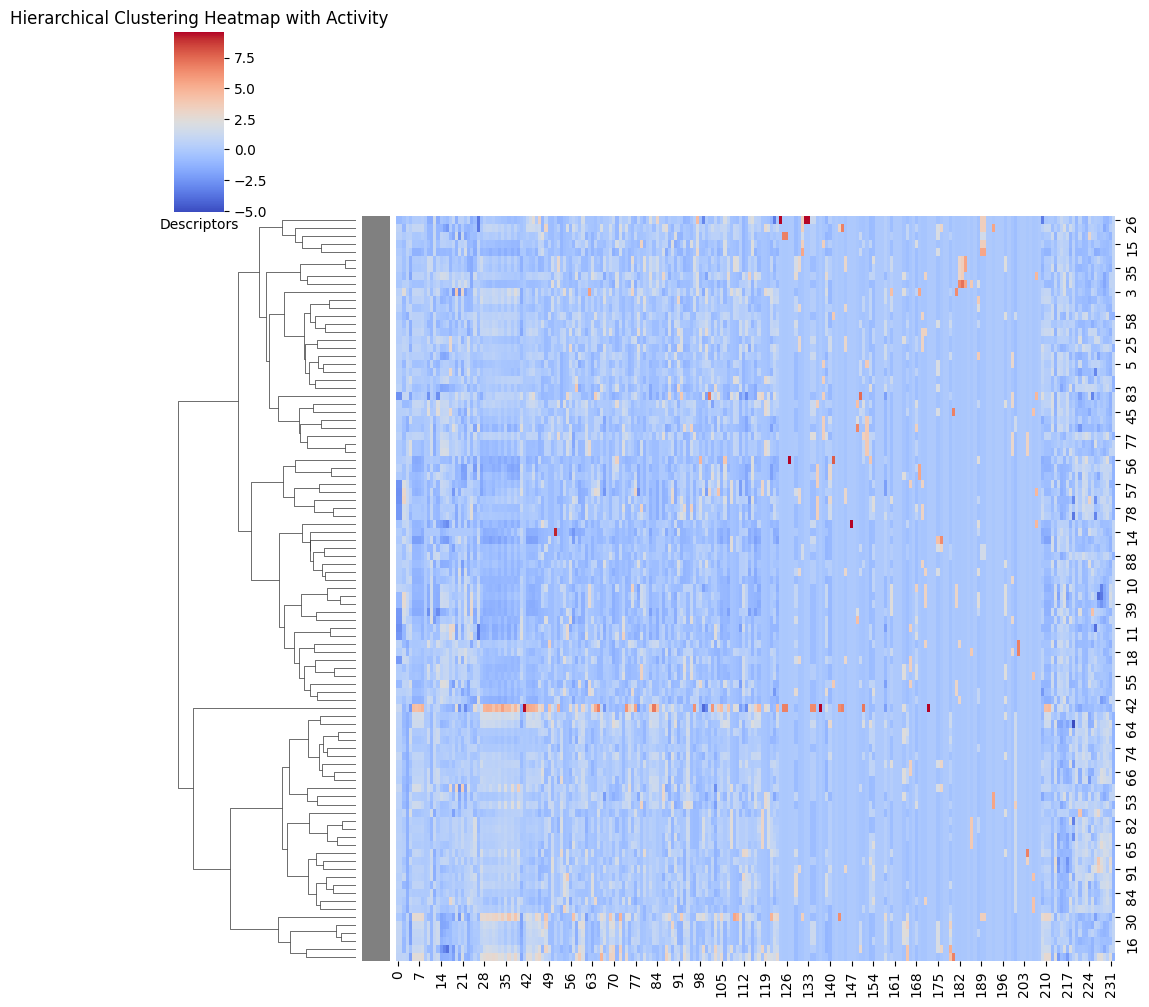

In [466]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded your dataset into a variable named 'data'
# If not, load your dataset here. I'll use a placeholder name 'data' for demonstration.

# Read the descriptors from the CSV file
descriptors = pd.read_csv('descriptors2.csv', index_col=0)

# Include relevant columns in the descriptors DataFrame
# You may need to adjust these column names based on your actual dataset
descriptors = pd.concat([descriptors, data[['Ki', 'pKi', 'Fit_LogAC50', 'Efficacy', 'Activity_Score',
       'Fit_LogAC50', 'Fit_HillSlope', 'Fit_R2', 'Fit_InfiniteActivity',
       'Fit_ZeroActivity', 'Fit_CurveClass', 'Max_Response',
       'Activity at 0.00368 uM', 'Activity at 0.018 uM',
       'Activity at 0.092 uM', 'Activity at 0.460 uM', 'Activity at 2.300 uM',
       'Activity at 11.50 uM', 'Activity at 57.50 uM', 'pKi', 'ACTIVITY']]], axis=1)

# Map 'active' and 'inactive' to colors
activity_series = descriptors['ACTIVITY']
activity_colors = activity_series.map({'inactive': 'red', 'active': 'blue'})

# Replace nan values with a default color (e.g., 'gray')
default_color = 'gray'
activity_colors = activity_colors.fillna(default_color)

# Check for Missing Values in Descriptors Before Imputation
print("\nMissing Values in Descriptors Before Imputation:")
print(descriptors.isnull().sum())

# Impute missing values in descriptors with mean
imputer = SimpleImputer(strategy='mean')
descriptors_imputed = imputer.fit_transform(descriptors)

# Standardize features
scaler = StandardScaler()
descriptors_scaled = scaler.fit_transform(descriptors_imputed)

# Perform hierarchical clustering and plot the heatmap
plt.figure(figsize=(12, 8))
sns.clustermap(descriptors_scaled, method='ward', col_cluster=False, cmap='coolwarm', row_colors=activity_colors.values)
plt.title('Hierarchical Clustering Heatmap with Activity')
plt.xlabel('Descriptors')

plt.show()
